In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn import svm
import time
import random
from sklearn.metrics import accuracy_score

In [2]:
mnist_data = fetch_mldata('MNIST original')

In [3]:
index = []
for i in range(len(mnist_data.target)):
    if mnist_data.target[i] == 3 or mnist_data.target[i] == 9:
        index.append(i)

In [4]:
data = [mnist_data.data[i] for i in index]
target = [mnist_data.target[i] for i in index]

/Users/VyUng/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


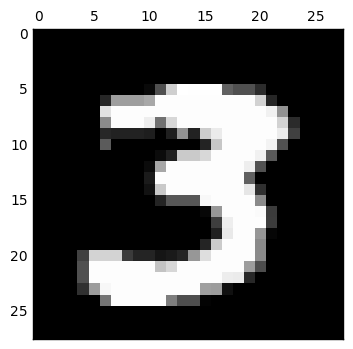

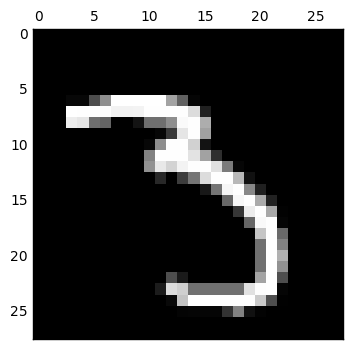

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.gray() 
plt.matshow(data[3].reshape(28,28))
plt.matshow(data[9].reshape(28,28))

plt.show() 

# Splitting into train set and test set 

In [6]:
(x_train,x_test,y_train,y_test)=train_test_split(np.array(data), 
                                                 target,
                                                 test_size=0.2, 
                                                 random_state=42)

# Linear Kernel

In [7]:
start_linear = time.time()
linear = svm.SVC(kernel= 'linear')
linear.fit(x_train, y_train)
linear_time = time.time() - start_linear
predicted_linear = linear.predict(x_test)

In [8]:
linear_accuracy=accuracy_score(y_test,predicted_linear)
print linear_time
print linear_accuracy

16.7636489868
0.972695035461


# Poly Kernel

In [9]:
start_poly = time.time()
poly = svm.SVC(kernel = 'poly')
poly.fit(x_train, y_train) 
poly_time = time.time() - start_poly
predicted_poly = poly.predict(x_test)

In [10]:
poly_accuracy = accuracy_score(y_test,predicted_poly)
print poly_time
print poly_accuracy

10.8888339996
0.993971631206


# RBF Kernel 

In [11]:
start_rbf = time.time()
rbf = svm.SVC(kernel = 'rbf')
rbf.fit(x_train, y_train) 
rbf_time = time.time() - start_rbf
predicted_rbf = rbf.predict(x_test)

In [12]:
rbf_accuracy = accuracy_score(y_test,predicted_rbf)
print rbf_time
print rbf_accuracy

477.993381023
0.503546099291


In [13]:
from tabulate import tabulate

In [14]:
table= tabulate([['Linear',linear_time,linear_accuracy],
                ['Poly',poly_time,poly_accuracy],
                ['RBF',rbf_time,rbf_accuracy]],
                headers=['Type of Kernel','Train time (s)','Accuracy'],
                tablefmt='orgtbl')
print (table)

| Type of Kernel   |   Train time (s) |   Accuracy |
|------------------+------------------+------------|
| Linear           |          16.7636 |   0.972695 |
| Poly             |          10.8888 |   0.993972 |
| RBF              |         477.993  |   0.503546 |


From the table we can see that the RBF Kernel takes the longest to run, but returns the lowest accuracy score. The Poly Kernel runs the most quickly, and returns the highest accuracy score. 